<a href="https://colab.research.google.com/github/meetu30/ISS/blob/main/SentimentAnalysisVADER_Flair_Aruana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # PART 1: Sentiment Analysis using VADER

In [39]:
# download vader_lexicon using nltk.download()
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [40]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#Read the csv
fileName = "/content/drive/My Drive/ISS/CompiledCases.csv"
column = "Case"
Data = pd.read_csv(fileName,encoding="Latin-1")
Data = Data.replace(np.nan,' ',regex=True)
sentences = list(Data[column])
Data.head()


,ID,Case
0,1,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...
1,2,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...
2,3,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...
3,4,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S..."
4,5,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c..."


In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
# Calculate Polarity scores
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
def createPolarity(sentence):
    ss = sid.polarity_scores(sentence)
    return ss

In [44]:
Data["sentiment"] = Data["Case"].apply(lambda x: createPolarity(x) )

In [45]:
df = Data[["Case", "sentiment"]]
df.head()

,Case,sentiment
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}"
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}"
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}"
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}"
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}"


In [46]:
df.dtypes

Case         object
sentiment    object
dtype: object

#Breaking this series into 4 different columns - neg, neu, pos and compound
df['compound']  = df['sentiment'].apply(lambda score_dict: score_dict['compound'])
df['Negative']  = df['sentiment'].apply(lambda score_dict: score_dict['neg'])
df['Positive']  = df['sentiment'].apply(lambda score_dict: score_dict['pos'])
df['Neutral']  = df['sentiment'].apply(lambda score_dict: score_dict['neu'])

df.head()

In [47]:
#On the basis of compound column, we will create a new column Final Sentiment
def analyze_sentiment_vader_lexicon(review):
   
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    #sentiment_Vader = 'positive' if agg_score >= threshold\
     #                              else 'negative'
    
    if(agg_score >= 0.05):
        sentiment_Vader = 'positive'
    elif(agg_score <= -0.05):
        sentiment_Vader = 'negative'
    else:
        sentiment_Vader = 'neutral'
      
    
    return sentiment_Vader 
#or 1 liner
#df['sentiment_Vader'] = df['compound'].apply(lambda x: 'positive' if x > 0.1 else 'negative')

In [48]:
df["sentiment_Vader"] = df["Case"].apply(lambda x: analyze_sentiment_vader_lexicon(x) )

In [49]:
# to display more of the text content
pd.set_option('display.max_colwidth', 100)

df.head(30)

,Case,sentiment,sentiment_Vader
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",negative
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",positive
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",positive
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}",negative
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}",positive
5,"Ms SD, a German national, contacted ISS Germany looking for her father she had never met and who...","{'neg': 0.019, 'neu': 0.91, 'pos': 0.071, 'compound': 0.7354}",positive
6,"Jose was deported from the USA to his homeland in Mexico, leaving behind his wife, Mariel and th...","{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.9903}",positive
7,Karim (6) and Ziad (8) are the sons of two divorced Lebanese nationals. The father remarried a L...,"{'neg': 0.026, 'neu': 0.875, 'pos': 0.099, 'compound': 0.926}",positive
8,"Children from Guinea Bissau, who under the pretext of being drought by Koranic Masters to learn ...","{'neg': 0.022, 'neu': 0.871, 'pos': 0.107, 'compound': 0.872}",positive
9,Mary Jackson (not her real name) is a 15 year old girl with a very strong passion for education ...,"{'neg': 0.065, 'neu': 0.839, 'pos': 0.096, 'compound': 0.8144}",positive


df.to_csv("sentimentAnalysis.csv")

In [50]:
#Total number of different actual sentiments
actualNeg = len(df[df['sentiment_Vader']=='negative'])
actualPos = len(df[df['sentiment_Vader']=='positive'])
actualNeu = len(df[df['sentiment_Vader']=='neutral'])
print("Number of positive sentiments is  " + str(actualPos))
print("Number of negative sentiments is " + str(actualNeg))
print("Number of neutral sentiments is " + str(actualNeu))


Number of positive sentiments is  59
Number of negative sentiments is 156
Number of neutral sentiments is 1


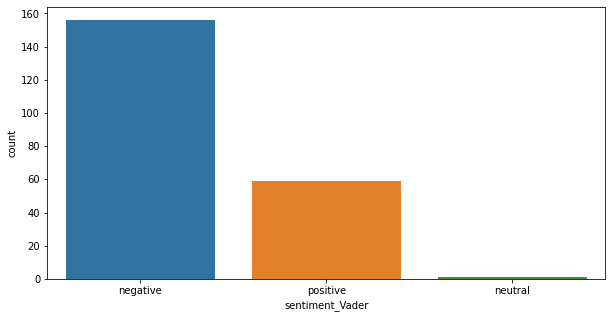

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment_Vader',data=df)

In [52]:
#Count of texts in each category of sentiments
temp = df.groupby('sentiment_Vader').count()['Case'].reset_index().sort_values(by='Case',ascending=False)
temp.style.background_gradient(cmap='Greens')

,sentiment_Vader,Case
0,negative,156
2,positive,59
1,neutral,1


In [53]:
#funnel chart for visualization
from plotly import graph_objs as go
import plotly.figure_factory as ff

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment_Vader,
    values = temp.Case,
    title = {"position": "top center", "text": "Funnel-Chart of VADER Sentiment Distribution"}
    ))
fig.show()

# PART 2: Sentiment Analysis using Flair





In [54]:
#source - https://colab.research.google.com/drive/1tUr5t0ZJ-I4Ni40dkbjku92HAU5SyR_2?usp=sharing#scrollTo=tIdJp01PsbGT
!pip install -q flair 



In [55]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')


2020-11-10 02:46:55,347 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [56]:
def text_sentiment_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  #return sentence.labels[0].score
  return sentence.labels
#These all are Negative 

In [57]:
df['sentiment_flair'] = df['Case'].apply(lambda x : text_sentiment_flair(x))

In [58]:
df.head()

,Case,sentiment,sentiment_Vader,sentiment_flair
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",negative,[NEGATIVE (0.9888)]
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",positive,[NEGATIVE (0.9995)]
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",positive,[NEGATIVE (0.9988)]
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}",negative,[NEGATIVE (0.9908)]
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}",positive,[NEGATIVE (0.5476)]


In [59]:
# How Flair Output looks like
sentence1 = Sentence('The food was great!')
classifier.predict(sentence1)
# print sentence with predicted labels
print('Sentence 1 above is: ', sentence1.labels)

sentence2 = Sentence('The food was not good!')
classifier.predict(sentence2)
print('Sentence 2 above is: ', sentence2.labels)

Sentence 1 above is:  [POSITIVE (0.9961)]
Sentence 2 above is:  [NEGATIVE (0.9996)]


#PART 3: Sentiment Analysis using Aruana

In [60]:
!pip install -q Aruana 

In [61]:
#import emoji
!pip install -q emoji 

In [62]:
#Source - https://towardsdatascience.com/how-to-label-text-for-sentiment-analysis-good-practises-2dce9e470708
import emoji
from aruana import Aruana
aruana = Aruana('pt-br')
sentiment = aruana.random_classification(df['Case'], classes=[0,1], balanced=True)
df['sentiment_Aruana'] = sentiment

Class 0: 109 values
Class 1: 106 values


/usr/local/lib/python3.6/dist-packages/aruana/aruana.py:1258: Warning:

Could not load model. Execution will continue, but you can't do annotations unless you download the necessary models.



In [64]:
df.head(5)

,Case,sentiment,sentiment_Vader,sentiment_flair,sentiment_Aruana
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",negative,[NEGATIVE (0.9888)],1
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",positive,[NEGATIVE (0.9995)],1
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",positive,[NEGATIVE (0.9988)],0
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}",negative,[NEGATIVE (0.9908)],1
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}",positive,[NEGATIVE (0.5476)],1
